<a href="https://colab.research.google.com/github/hwayoung306/AI/blob/main/20220504_ml_07_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%AA%A8%EB%8D%B8%ED%8F%89%EA%B0%80_%EC%84%B1%EB%8A%A5%ED%96%A5%EC%83%81_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

In [2]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

### 구글드라이브 연동

In [ ]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

## 학습목표

머신러닝 모델의 성능을 평가하고, 올바른 매개변수를 선택하는 방법을 이해한다.

1. 모델의 일반화 성능을 평가(측정)하는 법

- 교차 검증 : 안정적인 일반화 성능 측정 방법

- 평가 지표
 - 이진/다중 분류의 평가 지표
 > 정확도, 오차 행렬, 분류 리포트,  <br>
 > 정밀도, 재현율, f1_score, 정밀도-재현율 곡선(ROC), AUC

 - 회귀의 평가 지표
 > \\( R^2 \\) , 평균제곱오차, 평균절대값오차


2. 매개변수를 튜닝하여 일반화 성능을 개선

- 그리드 서치(grid search) : 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도
- 매개변수를 조정하기 전에 그 매개변수의 의미를 이해하는 것이 중요

## 학습/테스트 데이터 세트 분리

- 테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측하면 예측 정확도 100% 가 됨
= 학습을 위한 데이터의 양을 일정 수준 이상으로 보장하는 것이 중요
- 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해 보는 것도 매우 중요

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
```
train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
```
Parameter

- arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

- test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25) <br>
(전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정)

- train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지) <br>
(test_size 를 통상적으로 사용하기 때문에 잘 사용되지 않음)

- random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력) <br>
(호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값. 지정하지 않으면 호출 시 무작위로 데이터를 분리하므로 수행할 때마다 다른 학습/테스트용 데이터를 생성)

- shuffle : 셔플여부설정 (default = True) <br>
(데이터를 분리하기 전에 미리 섞을지를 결정. 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용)

- stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

Return

- X_train, X_test, y_train, y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.
- X_train, X_test : arrays에 레이블(y) 없이 데이터만 넣었을 경우의 반환


# 교차 검증 (Cross Validation)

- 교차검증 : 일반화 성능 향상을 위해 훈련 세트와 테스트 세트로 한 번 나누는 것보다 더 안정적이고 뛰어난 평가 방법
 - 데이터 편중을 막기 위함
 - 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행

- k-겹 교차검증 : 데이터를 폴드(fold)라는 거의 비슷한 크기의 부분집합을 k개로 분리하고 각 부분집합의 정확도를 측정

- scikit-learn에서 교차 검증은 model_selection 모듈의 cross_val_score 함수로 구현


[cross_val_score()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

```
cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
```
Parameter

- estimator : 평가하려는 모델
- X : 훈련 데이터
- y : 타깃 레이블
- cv : 교차 검증 분할 수(k)

Return
- 교차 검증 결과 정확도 점수의 배열

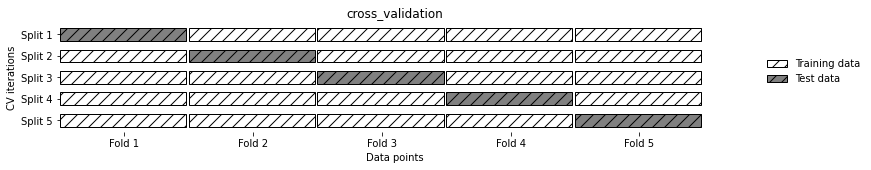

In [4]:
import mglearn
# 5-겹 교차 검증에서의 데이터 분할
mglearn.plots.plot_cross_validation()

In [11]:
# 교차 검증을 간편하게
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target

model_lr = LogisticRegression()
model_tree = DecisionTreeClassifier(random_state=0)

scores = cross_val_score(model_lr, X, y, cv =5)
print( 'lr : ', scores, scores.mean() )

scores = cross_val_score(model_tree, X, y, cv =5)
print( 'tree : ', scores, scores.mean() )

lr :  [0.96666667 1.         0.93333333 0.96666667 1.        ] 0.9733333333333334
tree :  [0.96666667 0.96666667 0.9        0.96666667 1.        ] 0.9600000000000002


- cross_val_score의 기본값은 5-겹 교차 검증이므로 정확도 값이 5개가 반환 <br>
(scikit-learn 0.22 부터 기본값은 5-겹, 기존 기본값 3-겹)

- 폴드의 수는 cv 매개변수를 사용해서 바꿀 수 있음



In [12]:
scores = cross_val_score(model_lr,X,y,cv=3)
print( 'lr : ', scores)

lr :  [0.98 0.96 0.98]


- 보통 교차 검증의 정확도를 간단하게 나타내려면 평균을 사용

In [13]:
scores = cross_val_score(model_lr, X, y, cv=3)
print( 'lr:', scores.mean() )

lr: 0.9733333333333333


여러 개의 평가 지표 반환 교차 검증 함수

[cross_validate()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

```
cross_validate(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False, error_score=nan)
```
Parameter

- estimator : 평가하려는 모델
- X : 훈련 데이터
- y : 타깃 레이블
- cv : 교차 검증 분할 수(k)
- return_train_score : 훈련 점수 포함 여부

Return
- 교차 검증 결과 정확도 점수의 배열

In [14]:
# 분할마다 훈련과 테스트에 걸린 시간을 담은 여러 개의 평가 지표 딕셔너리를 반환
from sklearn.model_selection import cross_validate

res = cross_validate(model_tree, X, y, return_train_score=True)
res

{'fit_time': array([0.0085392 , 0.00404739, 0.00134039, 0.001333  , 0.00754237]),
 'score_time': array([0.00053406, 0.00049472, 0.00047255, 0.00045061, 0.0018754 ]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [19]:
# 판다스를 사용하여 결과값을 출력하고 평균을 계산
import pandas as pd

df = pd.DataFrame(res)
display( df ); print()
df.mean()

,fit_time,score_time,test_score,train_score
0,0.008539,0.000534,0.966667,1.0
1,0.004047,0.000495,0.966667,1.0
2,0.001340,0.000473,0.900000,1.0
3,0.001333,0.000451,0.966667,1.0
4,0.007542,0.001875,1.000000,1.0


fit_time       0.004560
score_time     0.000765
test_score     0.960000
train_score    1.000000
dtype: float64

#### 교차 검증 장단점

- 테스트 세트에 골고루 각 샘플이 정확하게 한 번씩 들어감
- 교차 검증의 점수가 높으면 데이터셋에 있는 모든 샘플에 대해 모델이 잘 일반화됨
- 모델이 훈련 데이터에 얼마나 민감한지 알 수 있음
- 분할을 한 번 했을 때보다 데이터를 더 효과적으로 사용
> 5-겹의 경우 매 반복에서 4/5 (80%)의 데이터를 모델 학습에 사용. <br> 
> 10-겹의 경우 90%를 사용

- 연산 비용이 늘어나는 단점이 있음 (k배 더 느림)


### 계층별 k-겹 교차 검증 

- 데이터셋을 나열 순서대로 k개의 폴드로 나누는 것은 항상 좋지는 않음

In [20]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- 결과에서 볼 수 있듯이 1/3은 클래스 0, 1/3은 클래스 1, 1/3은 클래스 2이다.

- 이 데이터에 3-겹 교차 검증을 적용한다면 첫 번째 폴드는 클래스 0만 가지고 있으므로 정확도는 0이 됨

- 두 번째, 세 번째도 같은 방법으로 정확도는 0이 됨 

- 단순한 k-겹 교차 검증에는 문제가 있으니, scikit-learn은 분류일 경우 이 방법 대신 계층별 k-겹 교차 검증을 사용

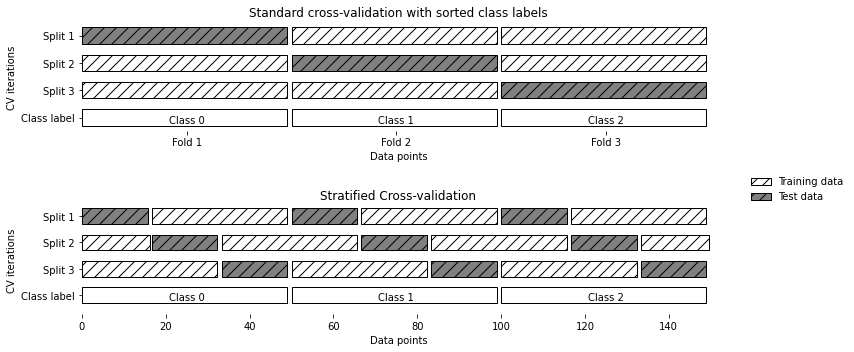

In [21]:
# 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눔
mglearn.plots.plot_stratified_cross_validation()

- 대부분 회귀에서는 k-겹 교차 검증
- 분류에서는 계층별 k-겹 교차 검증의 기본값이 잘 작동

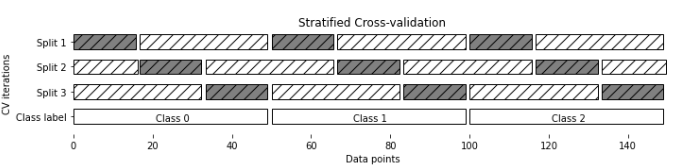

In [22]:
from sklearn.model_selection import StratifiedKFold

# 셔플하지 않은 데이터 ( 셔플을 하지 않아도 알아서 cross로 그림을 그려줌 )
kfold = StratifiedKFold(n_splits=3)
cross_val_score(model_tree, X, y, cv=kfold)

array([0.98, 0.94, 0.98])

In [24]:
# 셔플을 한 데이터
kford = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
scores = cross_val_score(model_tree, X, y, cv=kfold)
print( 'tree : ', scores, scores.mean() )

tree :  [0.98 0.94 0.98] 0.9666666666666667


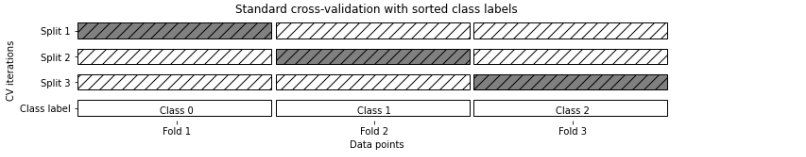

In [25]:
# cv 매개변수에 교차 검증 분할기 cross-validation splitter를 사용하여 
# 데이터를 분할할 때 세밀하게 제어
# * 회귀모델에 사용하면 좋음
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)
scores = cross_val_score(model_tree, X, y, cv = kfold)
print( 'tree : ', scores, scores.mean() )

tree :  [0. 0. 0.] 0.0


In [26]:
# 데이터를 분할하기 전에 섞어주면 결과가 향상
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
scores = cross_val_score(model_tree, X, y, cv = kfold)
print( 'tree : ', scores, scores.mean() )

tree :  [0.98 0.98 0.96] 0.9733333333333333


### 임의 분할 교차 검증 (shuffle-split cross-validation)

- 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 때 유용
- train_size와 test_size의 합을 전체와 다르게 함으로써 전체 데이터의 일부만 사용 가능
- 데이터 부분 샘플링(subsampling)하는 방식은 **대규모 데이터셋**으로 작업할 때 도움이 됨



[ShuffleSplit()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)

```
ShuffleSplit(n_splits=10, *, test_size=None, train_size=None, random_state=None)
```
- train_size 만큼의 포인트로 훈련 세트를 만들고, test_size만큼의 (훈련 세트와 중첩되지 않은) 포인트로 테스트 세트를 만들도록 분할

- n_splits 횟수만큼 반복

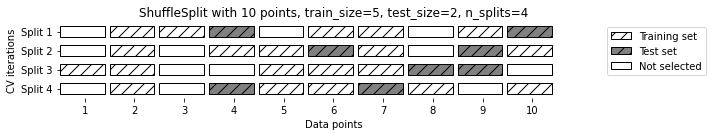

In [ ]:
# 10개의 데이터 포인트에 train_size=0.5, test_size=0.2, n_splits=4를 적용한 ShuffleSplit
mglearn.plots.plot_shuffle_split()

In [27]:
from sklearn.model_selection import ShuffleSplit
                # 돌리는 횟수
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size = 0.2, random_state=0)
scores = cross_val_score(model_tree, X, y, cv = ss)
print( 'tree : ', scores, scores.mean() )

tree :  [1.         0.93333333 0.93333333 0.86666667 1.         0.93333333
 1.         1.         0.96666667 0.96666667] 0.96


### 그룹별 교차 검증 (groups cross-validation)

- 데이터 안에 매우 연관된 그룹이 있을 때
- 예: 같은 환자로부터 얻은 여러 샘플을 가지고 새로운 환자에게 일반화하는 의료 애플리케이션

- groups 배열은 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것으로 클래스 레이블과 혼동해서는 안됨

[GroupKFold()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html)

```
GroupKFold(n_splits=5)
```
- n_splits : 폴드 수 (2 이상)


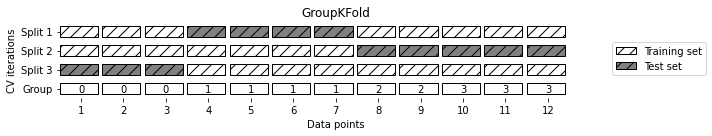

In [ ]:
# 레이블에 기반한 GroupKFold 분할
mglearn.plots.plot_group_kfold()

In [30]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

# 인위적 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플은 같은 그룹에 속하고
# 다음은 네 개의 샘플이 같음
groups = [0,0,0,1,1,1,1,2,2,3,3,3]

gkf = GroupKFold(n_splits=3)
scores = cross_val_score(model_tree, X, y, cv=gkf, groups = groups)
print('tree : ', scores, scores.mean() )

tree :  [0.75       0.4        0.66666667] 0.6055555555555555


### 반복 교차 검증

- 데이터셋의 크기가 크지 않을 경우 안정된 검증 점수를 얻기 위해 교차 검증을 반복하여 여러 번 수행

- RepeatedKFold : 회귀에 사용
- RepeatedStratifiedKFold : 분류에 사용

In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold

X = iris.data
y = iris.target

rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

scores = cross_val_score(model_tree, X, y, cv=rskfold)
print( 'tree:', scores, scores.mean() )

tree: [0.96666667 0.96666667 0.86666667 0.96666667 0.9        1.
 0.86666667 0.96666667 0.96666667 1.         0.93333333 1.
 0.96666667 0.93333333 0.96666667 1.         0.9        1.
 0.83333333 0.96666667 1.         0.93333333 0.96666667 0.9
 0.93333333 0.9        1.         1.         0.93333333 0.93333333
 0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.96666667 0.9        0.96666667 1.         1.         0.96666667
 0.9        0.96666667 0.96666667 0.93333333 0.96666667 0.9
 0.96666667 1.        ] 0.9506666666666668


- 전체 검증 점수는 n_splits * n_repeats 개수만큼 만들어짐

# 그리드 서치 (Grid Search)

- 매개변수을 선택하는 것은 머신러닝에서 중요한 일

- GRID_SEARCH : 관심 있는 매개변수들을 대상으로 가능한 모든 조합 시도하는 것

### 검증 세트

- 매개변수를 조정하기 위해 테스트 세트를 사용하면 모델이 얼마나 좋은지 평가하는 것에 더 이상 사용할 수 없음
- 평가를 위해 모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요

- 데이터를 세 개의 세트로 만들어 이 문제를 해결
 - 훈련 세트로는 모델을 작성
 - 검증 (또는 개발) 세트로는 모델의 매개변수를 선택
 - 테스트 세트로는 선택된 매개변수의 성능을 평가

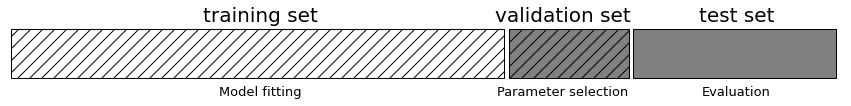

In [ ]:
mglearn.plots.plot_threefold_split()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state = 0)

# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state = 0)

print(X_trainval.shape, X_test.shape)
print( X_train.shape, X_val.shape)

# 그리드 서치
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100] :
    for C in [0.001, 0.01, 0.1, 1, 10, 100] :
        model = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = model.score(X_val, y_val) # 검증 평가
        if score > best_score :
            best_score = score
            best_params = {'C' : C, 'gamma' : gamma}


best_score, best_params

(112, 4) (38, 4)
(84, 4) (28, 4)


(1.0, {'C': 100, 'gamma': 0.001})

In [44]:
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가
model = SVC(**best_params).fit(X_trainval, y_trainval)
model.score(X_test, y_test)

0.9736842105263158

## 교차 검증을 사용한 그리드 서치

In [47]:
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듬
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100] :
    for C in [0.001, 0.01, 0.1, 1, 10, 100] :
        svm= SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv =5)
        score = scores.mean()
        if score > best_score :
            best_score = score
            best_params = {'C' : C, 'gamma' : gamma}

best_score, best_params

(0.9731225296442687, {'C': 10, 'gamma': 0.1})

In [48]:
model = SVC(**best_params).fit(X_trainval, y_trainval)
model.score(X_test, y_test)

0.9736842105263158

- 5-겹 교차 검증으로 C와 gamma 설정에 대한 SVM 정확도를 평가하려면 36 x 5 = 180 개의 모델이 필요

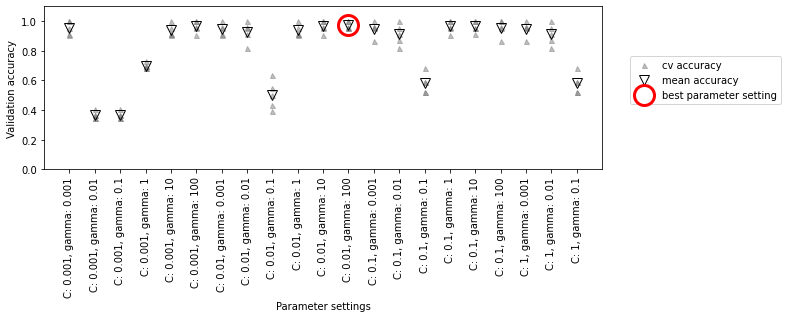

In [49]:
# 최적의 매개변수를 선택하는 방법
# 교차 검증 정확도 평균이 가장 높은 매개변수를 동그라미로 표시
mglearn.plots.plot_cross_val_selection()

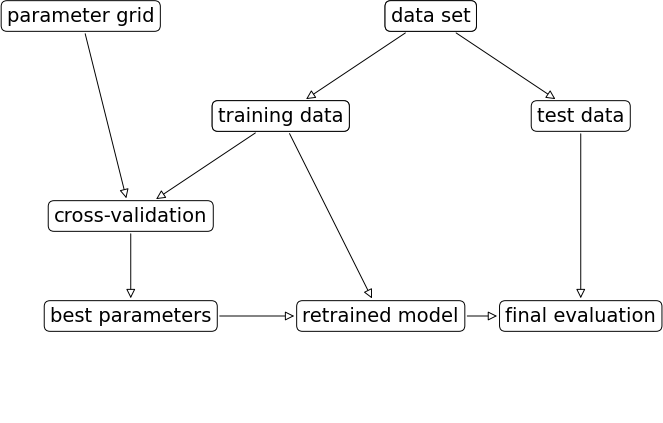

In [50]:
# 교차 검증과 그리드 서치를 사용한 매개변수 선택과 모델 평가의 작업 흐름
mglearn.plots.plot_grid_search_overview()

## GridSearchCV 메소드를 이용한 그리드서치

In [51]:
# param_grid
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
              

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

gs = GridSearchCV( SVC(), param_grid=param_grid, cv= 5, return_train_score=True)
gs

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

- GridSearchCV 객체에 fit() 매서드는 최적의 매개변수를 찾는 일 뿐만 아니라 교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 데이터 세트에 대해 새로운 모델을 자동을 만듬

- GridSearchCV는 전체 데이터로 학습한 모델에 접근할 수 있도록 predict()와 score() 메서드 제공

- GridSearchCV 분류 : StratifiedKFold 회귀 : KFold

- 사용에 따라서는 predict_proba, decision_function도 제공

In [55]:
gs.score(X_test, y_test)

0.9736842105263158

In [56]:
gs.best_score_, gs.best_params_

(0.9731225296442687, {'C': 10, 'gamma': 0.1})

- bast_score_ 속성에는 훈련 세트에서 수행한 교차 검증의 평균 정확도가 저장

- 최적 매개 변수에서 전체 훈련 세트를 사용하여 학습한 모델은 best_estimator_

- grid_search 객체가 predict와 score 메서드를 가지고 있으므로 예측이나 모델을 평가하기 위해 best_estimator_ 속성을 사용할 필요가 없음


In [58]:
gs.best_estimator_

SVC(C=10, gamma=0.1)

## 교차 검증 결과 분석

- 교차 검증의 결과를 시각화하면 검색 대상 매개변수가 모델의 일반화에 영향을 얼마나 주는지 이해하는 데 도움이 됨

In [59]:
import pandas as pd
import numpy as np

df = pd.DataFrame(gs.cv_results_)
df.head().T

,0,1,2,3,4
mean_fit_time,0.00185,0.001781,0.001849,0.001852,0.00181
std_fit_time,0.000113,0.000066,0.000082,0.000118,0.000089
mean_score_time,0.000783,0.000765,0.000754,0.000772,0.000762
std_score_time,0.000028,0.00003,0.000013,0.000035,0.000022
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


### C와 gamma 시각화

 

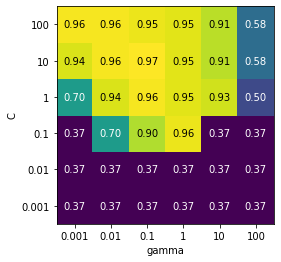

In [70]:
import mglearn

# 교차 검증 평균 점수 히트맵 그래프
scores = np.array(df.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel = 'gamma',xticklabels=param_grid['gamma'] ,
                      ylabel = 'C', yticklabels=param_grid['C'])

### 바람직하지 못한 예

- 검색 범위가 적절하게 선택되지 않은 경우

In [ ]:
import matplotlib.pyplot as plt


## 랜덤 서치 (RandomizedSearchCV)

- 기본적으로 10개의 하이퍼파라미터 조합을 선택
- GridSearchCV가 탐색할 하이퍼파라미터 조합이 너무 많아 적용하기 힘들 때 사용

In [75]:
# 심장 질환 데이터셋
import pandas as pd
df = pd.read_csv(drive_path + 'heart_disease.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [77]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

((303, 13), (303,))

In [78]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

xgb = XGBClassifier(randmo_state =0, verbosity=0)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [79]:
params = {'n_estimators' : [ 100, 200, 400, 800] }

In [84]:
# RandomizedSearchCV
grid = RandomizedSearchCV(xgb, params, cv=kfold,n_iter=20, random_state=0)

grid.fit(X,y) # X와 y에서 하이퍼파라미터 튜닝을 수행
print( '최상의 매개변수 : ',  grid.best_params_)
print('최상의 점수 : ', np.round(grid.best_score_,5) )

최상의 매개변수 :  {'n_estimators': 100}
최상의 점수 :  0.79885


In [85]:
# GridSearchCV
grid = GridSearchCV(xgb, params, cv=kfold)

grid.fit(X,y) # X와 y에서 하이퍼파라미터 튜닝을 수행
print( '최상의 매개변수 : ',  grid.best_params_)
print('최상의 점수 : ',  np.round(grid.best_score_,5))

최상의 매개변수 :  {'n_estimators': 100}
최상의 점수 :  0.79885


In [89]:
def grid_search(params, random=False):
  xgb = XGBClassifier(random_state=0, verbosity=0)
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
  if random:
    grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=20, random_state=0)
  else:
    grid = GridSearchCV(xgb, params, cv=kfold)

  grid.fit(X, y)     # X와 y에서 하이퍼파라미터 튜닝을 수행
  print('최상의 매개변수:', grid.best_params_ )
  print('최상의 점수:', np.round(grid.best_score_, 5))

XGBoost 하이퍼파라미터 튜닝

In [90]:
grid_search(params={'n_estimators': [100, 200, 400, 800] })

최상의 매개변수: {'n_estimators': 100}
최상의 점수: 0.79885


In [91]:
grid_search(params={'learning_rate': [0.007, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5] })

최상의 매개변수: {'learning_rate': 0.01}
최상의 점수: 0.81514


In [92]:
grid_search(params={'max_depth': [1, 2, 3, 5, 6, 8] })

최상의 매개변수: {'max_depth': 1}
최상의 점수: 0.82492


In [93]:
grid_search(params={'gamma': [0, 0.01, 0.1, 0.5, 1, 2, 3, 4] })

최상의 매개변수: {'gamma': 4}
최상의 점수: 0.81514


In [94]:
grid_search(params={'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1] })

최상의 매개변수: {'subsample': 0.8}
최상의 점수: 0.82842


최종 (조기종료 적용)

In [96]:
grid_search(params={'n_estimators': [100, 200, 400, 800],
                    'learning_rate': [0.007, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5] ,
                    'max_depth': [1, 2, 3, 5, 6, 8],
                    'gamma': [0, 0.01, 0.1, 0.5, 1, 2, 3, 4] ,
                    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]
                    }, random = True)

최상의 매개변수: {'subsample': 0.5, 'n_estimators': 800, 'max_depth': 6, 'learning_rate': 0.007, 'gamma': 2}
최상의 점수: 0.83497


In [97]:
params = {'subsample': 0.5, 'n_estimators': 800, 'max_depth': 6, 
          'learning_rate': 0.007, 'gamma': 2}

In [101]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

model = XGBClassifier(params=params)

eval_set = [ (X_test, y_test) ]
model.fit(X_train, y_train,
          eval_set = eval_set,
          eval_metric = 'error' )

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print( '정확도 : ', acc)

model.score(X_test, y_test)

[0]	validation_0-error:0.171053
[1]	validation_0-error:0.171053
[2]	validation_0-error:0.171053
[3]	validation_0-error:0.171053
[4]	validation_0-error:0.171053
[5]	validation_0-error:0.171053
[6]	validation_0-error:0.184211
[7]	validation_0-error:0.171053
[8]	validation_0-error:0.171053
[9]	validation_0-error:0.171053
[10]	validation_0-error:0.184211
[11]	validation_0-error:0.184211
[12]	validation_0-error:0.184211
[13]	validation_0-error:0.184211
[14]	validation_0-error:0.184211
[15]	validation_0-error:0.184211
[16]	validation_0-error:0.184211
[17]	validation_0-error:0.184211
[18]	validation_0-error:0.197368
[19]	validation_0-error:0.197368
[20]	validation_0-error:0.184211
[21]	validation_0-error:0.197368
[22]	validation_0-error:0.197368
[23]	validation_0-error:0.184211
[24]	validation_0-error:0.184211
[25]	validation_0-error:0.184211
[26]	validation_0-error:0.197368
[27]	validation_0-error:0.197368
[28]	validation_0-error:0.197368
[29]	validation_0-error:0.197368
[30]	validation_0-er

0.8289473684210527

# 모델 평가

분류의 평가 지표

정확도, 오차 행렬, 분류 리포트,
정밀도, 재현율, f1_score, 정밀도-재현율 곡선(ROC), AUC

## 정확도 (Accuracy)

- 실제 데이터에서 에측 데이터가 얼마나 같은지를 판단하는 지표

 > \begin{equation}
\text{정확도(Accuracy)} = \frac{\text{예측결과가동일한데이터건수}}{\text{전체예측데이터건수}}
\end{equation}

- 직관적으로 모델 예측 성능을 나타내는 평가 지표

## 오차행렬 (Confusion Matrix)

- 학습된 분류 모델이 예측을 수행하면서 얼마나 혼란스러워(confused) 하고 있는지 함께 보여주는 지표
- 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표


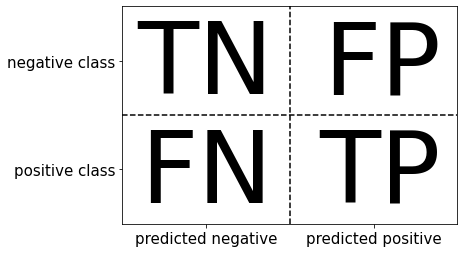

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

- True / False : 예측값과 실제값이 같은가 /틀린가
- Negative / Positive : 예측 결과 값이 부정(0) / 긍정(1)

- TN : 예측값을 Negative 값 0으로 예측했고 실제 값은 역시 Negative 값 0
- FP : 예측값을 Positive 값 1로 예측 했는데 실제 값은 Negative 값 0
- FN : 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1
- TP : 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1

[confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
```
confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
```
- y_true : 정답
- y_pred : 예측 결과

In [109]:
from sklearn.datasets import load_digits

# 손글씨 데이터
digits = load_digits()
digits.keys()
digits.target_names

# 불균형 데이터셋 생성
y = digits.target == 9
X = digits.data

X.shape, y.shape


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [110]:
model_lr = LogisticRegression(C=0.1).fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.9844444444444445

In [111]:
from sklearn.metrics import confusion_matrix

pred_lr = model_lr.predict(X_test)
confusion_matrix(y_test, pred_lr)

array([[402,   1],
       [  6,  41]])

- TN FP
- FN TP


In [113]:
model_tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
model_tree.score(X_test, y_test)

0.9533333333333334

In [115]:
pred_tree = model_tree.predict(X_test)
confusion_matrix(y_test, pred_tree)

array([[394,   9],
       [ 12,  35]])

오차 행렬에서 정확도 재정의

> \begin{equation}
\text{Accuracy} = \frac{\text{예측결과가동일한데이터건수}}{\text{전체예측데이터건수}}
= \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

## 정밀도(Precision)와 재현율(Recall)

 > \begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation} <br>
 > \begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

정밀도
 - 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
 - 거짓양성(FP)의 수를 줄이는 것이 목표일 때 성능 지표로 사용
 - 양성 예측도(PPV) 라고도 함

재현율
 - 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
 - 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용
 - 거짓 음성(FN)을 피하는 것이 중요할 때
 - 민감도(sensitivity), 적중률(hit rate), 진짜 양성 비율(TPR) 이라고도 함

- 정밀도가 상대적으로 더 중요한 지표인 경우
 - 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
 - 스팸 메일 판단 모델 : 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류하면 메일을 아예 받지 못하게 됨

- 재현율이 상대적으로 더 중요한 지표인 경우
 - 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
 - 암 판단 모델 : 실제 Positive인 암 환자를 Negative 음성으로 잘못 판단했을 경우 생명이 위험
 - 보험/금융 사기 적발 모델 : 실제 사기인 Positive 건을 Negative로 잘못 판단하면 회사에 손해가 큼

## F1 스코어

> \begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}

- 정밀도와 재현율을 결합한 지표
- 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 높은 값을 갖음

In [117]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_lr), f1_score(y_test, pred_tree)

(0.9213483146067415, 0.7692307692307692)

## 분류 리포트

[classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

- 정밀도, 재현율, f1-스코어 모두를 한 번에 깔끔하게 출력

In [119]:
from sklearn.metrics import classification_report

print( classification_report(y_test, pred_lr, target_names=['9아님', '9맞음']))

              precision    recall  f1-score   support

         9아님       0.99      1.00      0.99       403
         9맞음       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [120]:
print( classification_report(y_test, pred_tree, target_names=['9아님', '9맞음']))

              precision    recall  f1-score   support

         9아님       0.97      0.98      0.97       403
         9맞음       0.80      0.74      0.77        47

    accuracy                           0.95       450
   macro avg       0.88      0.86      0.87       450
weighted avg       0.95      0.95      0.95       450



## ROC, AUC


ROC(Receiver Operating Characteristic) : 여러 임계값에서 분류기의 특성을 분석하는데 널리 사용되는 도구
- ROC 곡선은 분류기의 모든 임계값을 고려하지만 정밀도와 재현율 대신에 거짓 양성 비율 (FPR)이 변할 때 진짜 양성 비율 (TPR)이 어떻게 변하는지를 나타내는 곡선

> \begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

- 진짜 양성비율 : 재현율
- 가짜 양성비율 : 전체 음성 샘플 중에서 거짓 양성으로 잘못 분류한 비율

AUC(Area Under the Curve) : ROC 곡선 아래의 면적값



[roc_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) : ROC 곡선을 그리는 메소드

Parameters
- y_true : 실재 클래스 값 array (array shape = [데이터 건수])
- y_score : predict_proba()의 반환 값 array에서 Positive 컬럼의 예측 확뉼이 보통 사용됨. array, shape = [n_samples]

Returns
- fpr : FPR (거짓 양성 비율)
- tpr : TPR (진짜 양성 비율, 재현율, 민감도)
- thresholds : fpr 및 tpr을 계산하는 데 사용되는 결정 함수의 임계값


- [roc_auc_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) : AUC 계산 메소드

decision_function

분류모델 예측의 불확실성을 추정할 수 있는 기능으로 결정함수(decision_function)와 예측확률(predict_proba)이 있습니다. 보통 2가지를 제공하는데 모델에 따라 1가지만 제공하는 경우가 있습니다.

결정함수(decision_function)의 값은 1차원으로 데이터 포인트가 양성 클래인 클래스 1에 속한다고 믿는 정도를 나타냅니다.
양수 값은 양성 클래스를 의미하며 음수 값은 음성 클래스를 의미합니다.

In [ ]:
# 데이터 포인트


In [ ]:
# ROC 곡선 그리기
from sklearn.metrics import roc_curve


- ROC 곡선은 왼쪽 위에 가까울수록 이상적
- 거짓 양성 비율(FPR)이 낮게 유지되면서 재현율이 높은 분류기가 좋은 것

In [ ]:
# 랜덤 포레스트와 SVM의 ROC 곡선 비교
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# AUC
from sklearn.metrics import roc_auc_score


## 모델평가 실습 01


In [ ]:
from sklearn.datasets import load_breast_cancer



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


### confusion matrix

- 0,0 진짜 악성, 예측 악성
- 0,1 진짜 악성, 예측 양성
- 1,0 진짜 양성, 예측 악성
- 1,1 진짜 양성, 예측 양성

In [ ]:
from sklearn import metrics


### ROC 곡선 그리기

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# 결정함수


### C값 조정

In [ ]:
from  sklearn.model_selection import GridSearchCV
# GridSearchCV
# param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# 분류리포트 1의 경우 f1-score 는? 


### ROC 곡선 비교

### scoring을 이용한 ROC 교차검증

- scoring은 성능검증에 사용할 함수이름

In [ ]:
from sklearn.model_selection import cross_val_score

C_list = [0.001,0.01,0.1,1,10,100,1000]


### ROC 곡선 비교

## 회귀의 평가 지표

 > MSE (평균제곱오차) : 실제 값과 예측값의 차이를 제곱해 평균한 것

 > MAE (평균절대값오차) : 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것

 > $ \\ R^2 \\ $ : 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높음

 > RMSE ( $ \\ \sqrt{ MSE } \\ $ ) : MSE에 루트를 씌워 MSE의 실제 오류 평균보다 더 커지는 특성을 줄임

 > MSLE (Mean Squared Log Error) : MSE에 로그를 적용

 > RMSLE (Root Mean Squared Log Error) : RMSE에 로그를 적용

## 모델평가 실습 02

보스턴 주택 가격

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(boston.data, 
                                                    boston.target, 
                                                    random_state=0)




- 교차검증에서 MSE를 스코어로 사용하고 싶으면  scoring='neg_mean_squared_error' 옵션을 이용

- 사이킷런의 scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환

- 반환된 값에 다시 -1을 곱해야 양의 값이 원래 모델에서 계산된 MSE 값이 됨

- 일반적으로 회귀는 MSE 값이 낮을수록 좋은 회귀 모델 (오차값이 낮을 수록)

# 정리

1. 교차 검증을 해야 한다.
> 데이터를 분리해서 사용. 간단하게 한 번만 분리하는 대신 교차 검증으로 분할을 반복
 - 모델 학습에는 훈련 데이터
 - 모델과 매개변수 선택에는 검증 데이터
 - 모델 평가에는 테스트 데이터
 
 > 훈련 세트와 테스트 세트로 분할하고 모델과 모델 매개변수 선택을 위해 훈련 세트에 교차 검증을 적용


2. 모델 선택과 평가에 사용하는 평가 지표와 방법이 중요하다.
> 모델을 평가하고 선택하기 위한 지표가 이 모델이 실제로 사용되는 상황을 잘 대변해야 함
 - 실전에서는 분류 문제에 균형 잡힌 클래스를 가진 경우가 거의 없음
 - 거짓 양성(FP)과 거짓 음성(FN)이 매우 큰 영향을 미침